# Interacción entre Python, Shell y R

como ves, podemos ejecutar comandos shell desde este notebook. Fíjate que:

- con una admiración (!) intercalamos ejecuciones de shell en medio de nuestro código Python
- con dos admiraciones al principio de una celda, TODA la celda será ejecutada en un shell (no se interpreta el código Python)
- las variables de Python se pueden usar en las ejecuciones del shell
- capturamos los resultados de las ejecuciones shell en variables de Python
- para que las variables de entorno del shell y el directorio actual persistan entre llamadas desde distintas celdas hay que declararlas con %set_env y %cd
- Podemos pasar cualquier variable Python al shell

Y podemos ejecutar también código en R:
- con %R ejecutamos código R como con ! ejecutamos shell
- con %%R TODA la celda será ejecutada como código R
- las variables y el espacio de nombres de R persisten entre llamadas desde distintas celdas
- podemos intercambiar variables entre R y Python



# 1. Python y Shell

### Ejecutamos un comando cualquiera del sistema

In [45]:
!pwd

/home/user/share/teaching/bioinformatics-scripting/teacher


### Guardamos el resultado del comando en una variable python

In [49]:
ruta_actual = !pwd
print ruta_actual
path = !echo $PATH
print path

['/home/user/share/teaching/bioinformatics-scripting/teacher']
['/sbin:/usr/sbin:/bin:/usr/bin']


### Usamos una variable Python dentro de la línea de comando

In [58]:
for p in path[0].split(":"):
    files = !ls {p}
    print "number of files under", p, "is", len(files)
    

number of files under /sbin is 240
number of files under /usr/sbin is 154
number of files under /bin is 95
number of files under /usr/bin is 609


### Distintas formas de acceder al resultado recogido de una ejecución del shell

In [67]:
a = !ls
print "Como una lista"
print "type", type(a), 
print "len ", len(a)
print a
print "--"
print "Como un string unico"
print "type", type(a.s), 
print "len ", len(a.s)
print a.s
print "--"
print "Como una lista de paths"
print "type", type(a.p), 
print "len ", len(a.p)
print a.p

Como una lista
type <class 'IPython.utils.text.SList'> len  6
['aa', 'Notas 01 - Uso de la linea de comandos.ipynb', 'Notas 02 - Introduccion a Python y R.ipynb', 'scripting overview.ipynb', 'tmp', 'Untitled.ipynb']
--
Como un string unico
type <type 'str'> len  134
aa Notas 01 - Uso de la linea de comandos.ipynb Notas 02 - Introduccion a Python y R.ipynb scripting overview.ipynb tmp Untitled.ipynb
--
Como una lista de paths
type <type 'list'> len  6
[path(u'aa'), path(u'Notas 01 - Uso de la linea de comandos.ipynb'), path(u'Notas 02 - Introduccion a Python y R.ipynb'), path(u'scripting overview.ipynb'), path(u'tmp'), path(u'Untitled.ipynb')]


In [69]:
a = !ls
print a.grep("Notas")

['Notas 01 - Uso de la linea de comandos.ipynb', 'Notas 02 - Introduccion a Python y R.ipynb']


In [29]:
df = !df -h
print df
print df.fields()

['Filesystem            Size  Used Avail Use% Mounted on', '/dev/mapper/vg_c6-lv_root', '                      6.5G  3.8G  2.5G  61% /', 'tmpfs                 499M     0  499M   0% /dev/shm', '/dev/sda1             477M   25M  427M   6% /boot', '/home/user/share      112G  109G  3.8G  97% /home/user/share']
[['Filesystem', 'Size', 'Used', 'Avail', 'Use%', 'Mounted', 'on'], ['/dev/mapper/vg_c6-lv_root'], ['6.5G', '3.8G', '2.5G', '61%', '/'], ['tmpfs', '499M', '0', '499M', '0%', '/dev/shm'], ['/dev/sda1', '477M', '25M', '427M', '6%', '/boot'], ['/home/user/share', '112G', '109G', '3.8G', '97%', '/home/user/share']]


In [8]:
!echo $PATH

/opt/anaconda/bin:/opt/anaconda/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/usr/texbin


### Con `script` ejecutamos TODO el contenido de una celda en un shell

In [80]:
%%script bash
which ls
which unzip
pwd
which which

/bin/ls
/usr/bin/unzip
/home/user/share/teaching/bioinformatics-scripting/teacher
/usr/bin/which


In [81]:
%%script bash
mkdir tmp
cd tmp
cp `which ls` listar
./listar -ls

total 108
108 -rwxr-xr-x 1 user root 109208 Oct 13 22:05 listar


mkdir: cannot create directory `tmp': File exists


### el directorio actual y las variables de entorno solo son válidos en la celda en la que se ejecutan

In [12]:
!listar

/bin/sh: listar: command not found


In [13]:
!./listar

/bin/sh: ./listar: No such file or directory


In [84]:
%%script bash
pwd
cd tmp
./listar -las

/home/user/share/teaching/bioinformatics-scripting/teacher
total 108
  0 drwxr-xr-x 1 user root    102 Oct 13 14:45 .
  0 drwxr-xr-x 1 user root    306 Oct 13 22:06 ..
108 -rwxr-xr-x 1 user root 109208 Oct 13 22:05 listar


In [83]:
!./listar -las

/bin/sh: ./listar: No such file or directory


### usa %cd para que el cambio de directorio tenga efecto al ejecutar shells

In [85]:
%cd tmp

/home/user/share/teaching/bioinformatics-scripting/teacher/tmp


In [86]:
!./listar -las

total 108
  0 drwxr-xr-x 1 user root    102 Oct 13 14:45 .
  0 drwxr-xr-x 1 user root    306 Oct 13 22:08 ..
108 -rwxr-xr-x 1 user root 109208 Oct 13 22:05 listar


### usa %set_env para darle valor a variables de entorno

In [87]:
%%script bash
export MY_VAR="algo de texto"
echo $MY_VAR

algo de texto


In [88]:
!echo $MY_VAR

In [89]:
%%script bash
echo $MY_VAR

In [90]:
%set_env MY_VAR="otro texto"

env: MY_VAR="otro texto"


In [91]:
!echo $MY_VAR

"otro texto"


## añadir captura de stdout stderr y código de ejecución del proceso

# 2. Python y R

### Llama a una función R

In [ ]:
Llama a una función R

### Paso de una variable de R a Python

In [2]:
%%R 
v <- c(10,20,30,40)
print (v)

[1] 10 20 30 40


In [3]:
v = %R v

In [4]:
print v
print v+1

[ 10.  20.  30.  40.]
[ 11.  21.  31.  41.]


In [12]:
%%R
print (v)
print (v+1)

[1] 10 20 30 40
[1] 11 21 31 41


O con varias variables a la vez

In [35]:
%%R 
m <- c(140,240,340,420)
n <- c(410,420,530,540)

In [36]:
%Rpull m n
print m
print n

[ 140.  240.  340.  420.]
[ 410.  420.  530.  540.]


### Paso de variables de Python a R

In [28]:
import numpy as np
t = np.array([50,60,70,80])
s = np.array([150,160,720,820])
%Rpush t s

In [29]:
print t
print t+1
print s
print s+1

[50 60 70 80]
[51 61 71 81]
[150 160 720 820]
[151 161 721 821]


In [30]:
%%R
print (t)
print (t+1)
print (s)
print (s+1)


[1] 50 60 70 80
[1] 51 61 71 81
[1] 150 160 720 820
[1] 151 161 721 821


### Intercambio de variables con `-i` y `-o`

In [20]:
Z = np.array([1,4,5,10])
%R -i Z mean(Z)

array([ 5.])

In [21]:
%R -o W W=Z*mean(Z)
W

array([  5.,  20.,  25.,  50.])

### Las variables en R y Python ocupan espacios de memoria distintos

In [17]:
t = t*2
print t

[100 120 140 160]


In [19]:
%R print(t)

[1] 50 60 70 80


### Algo más elaborado

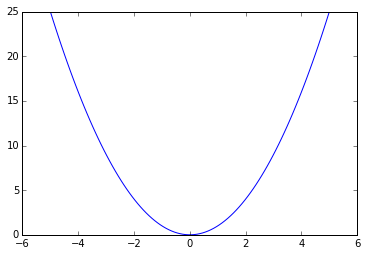

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-5,5,100)
y = x**2
plt.plot(x,y)

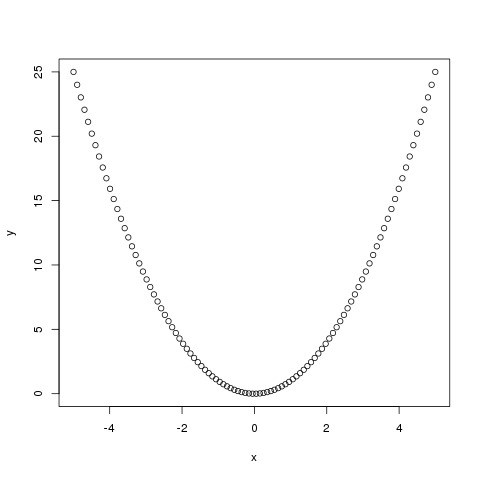

In [40]:
%Rpush x y
%R plot (x,y)

Intercambio de matrices (ojo los índices)

In [44]:
r = np.random.randint(10, size=(5,4))
print r
%Rpush r

[[5 0 8 0]
 [9 9 1 6]
 [4 7 7 1]
 [1 2 8 8]
 [4 6 7 7]]


In [52]:
%R print (r)

     [,1] [,2] [,3] [,4]
[1,]    5    0    8    0
[2,]    9    9    1    6
[3,]    4    7    7    1
[4,]    1    2    8    8
[5,]    4    6    7    7


In [55]:
%%R
print (r[1,])
print (r[,2:3])

[1] 5 0 8 0
     [,1] [,2]
[1,]    0    8
[2,]    9    1
[3,]    7    7
[4,]    2    8
[5,]    6    7


In [58]:
print r[0]
print r[:,1:3]

[5 0 8 0]
[[0 8]
 [9 1]
 [7 7]
 [2 8]
 [6 7]]


Intercambio de diccionarios (no es automático, ojo con los tipos de datos)

In [62]:
d = {"nombre": "pepe", "edad":32, "ciudad": "bucaramanga", "saldo": -30.43}
print d

{'edad': 32, 'nombre': 'pepe', 'ciudad': 'bucaramanga', 'saldo': -30.43}


In [63]:
%Rpush d

NotImplementedError: Conversion 'py2ri' not defined for objects of type '<type 'dict'>'

In [70]:
k = d.keys()
v = d.values()
%Rpush k v

In [71]:
%R print(k)
%R print(v)

[1] "edad"   "nombre" "ciudad" "saldo" 


[1] "32"          "pepe"        "bucaramanga" "-30.43"     


In [86]:
%%R
d <- list()
for (i in 1:length(k)) {
    print (c(k[i], v[i]))
    d[[k[i]]] <- v[i]
}

[1] "edad" "32"  
[1] "nombre" "pepe"  
[1] "ciudad"      "bucaramanga"
[1] "saldo"  "-30.43"


In [89]:
%%R
print (d$edad)

[1] "32"


In [85]:
%%R
d

$a
[1] 1

